In [32]:
# Data processing libraries

import pandas as pd           # data loading & handling
import numpy as np            # numerical operations

#Modeling and preprocessing

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#ML algorithms

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

#Model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report

#Visualization libraries
import matplotlib.pyplot as plt  # plotting
import seaborn as sns          # statistical data visualization


In [31]:
df = pd.read_csv('/Users/jon/Desktop/Ironhack/Unit 6 - Mchine Learning/Machine-Learning-Group-Project/Data/student-mat.csv', sep=";",header=0)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


DAY 2: DATA PREPERATION

In [3]:
# Devide data into features and target variable

features = df.drop(columns=['G1', 'G2', 'G3'])
target = df["G3"]

In [4]:
# Get the dummies for feature variables

features = pd.get_dummies(features)

In [5]:
print(features.columns)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_GP',
       'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')


DAY 3: MODEL DEVELOPMENT AND INITIAL TUNING

In [6]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



In [7]:
#Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
#Evaluate the model

y_pred = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Coefficients:", model.coef_)

RMSE: 17.60178286214418
R2 Score: 0.14158779387177023
Coefficients: [-3.75282465e-01  4.66037833e-01 -1.49104959e-01 -2.62055569e-01
  7.58673354e-01 -1.85467258e+00  2.92569265e-01  2.49664740e-01
 -4.18049458e-01 -1.46177278e-01  4.26149055e-02 -1.46475925e-01
  6.63247940e-02  2.09902589e+12  2.09902589e+12 -2.09487623e+11
 -2.09487623e+11 -1.12114132e+12 -1.12114132e+12  4.20006913e+11
  4.20006913e+11 -5.12928946e+10 -5.12928946e+10  9.53378907e+10
  9.53378907e+10  9.53378907e+10  9.53378907e+10  9.53378907e+10
  3.09610143e+09  3.09610143e+09  3.09610143e+09  3.09610143e+09
  3.09610144e+09 -1.09160744e+11 -1.09160744e+11 -1.09160744e+11
 -1.09160744e+11 -8.02827842e+11 -8.02827842e+11 -8.02827842e+11
 -8.14432389e+11 -8.14432389e+11  1.16858808e+12  1.16858808e+12
 -6.10484286e+11 -6.10484286e+11  2.38021416e+12  2.38021416e+12
  5.56608949e+11  5.56608949e+11 -2.39014355e+11 -2.39014355e+11
 -1.04839025e+12 -1.04839025e+12  9.16519248e+11  9.16519248e+11]


In [9]:
# Logistic Regression Model

# Change the target variable to a binary classification problem
target_binary = (df["G3"] >= 10).astype(int)  # Assuming a pass mark of 10

X_train, X_test, y_train_binary, y_test_binary = train_test_split(features, target_binary, test_size=0.2, random_state=42)

In [10]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train_binary)

LogisticRegression(max_iter=1000)

In [11]:
# Evaluate the logistic regression model
y_pred_binary = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test_binary, y_pred_binary)

# Evaluation
print("Accuracy:", accuracy_score(y_test_binary, y_pred_binary))
print(confusion_matrix(y_test_binary, y_pred_binary))
print(classification_report(y_test_binary, y_pred_binary))

Accuracy: 0.7341772151898734
[[12 15]
 [ 6 46]]
              precision    recall  f1-score   support

           0       0.67      0.44      0.53        27
           1       0.75      0.88      0.81        52

    accuracy                           0.73        79
   macro avg       0.71      0.66      0.67        79
weighted avg       0.72      0.73      0.72        79



In [12]:
# KNN Classifier

knn_model = KNeighborsClassifier(n_neighbors=5)

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Fit the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
# Evaluate the model
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.13924050632911392


ENSAMBLE METHODS

In [14]:
#Baggin and Pasting

bagging_model = BaggingRegressor(DecisionTreeRegressor(max_depth=20), n_estimators=100, random_state=42)

In [15]:
# Fit the model
bagging_model.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 n_estimators=100, random_state=42)

In [16]:
#Evaluate the model
y_pred_bagging = bagging_model.predict(X_test)
print("Bagging RMSE:", mean_squared_error(y_test, y_pred_bagging))
print("Bagging R2 Score:", r2_score(y_test, y_pred_bagging))

Bagging RMSE: 14.707154238081692
Bagging R2 Score: 0.2827544337834227


RANDOM FOREST METHOD

In [17]:
#Random Forest Regressor
forest = RandomForestRegressor(n_estimators=100,
                             max_depth=20)

In [18]:
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=20)

In [19]:
pred = forest.predict(X_test)

In [20]:
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test))
print("R2 score", forest.score(X_test, y_test))

MAE 2.98963785283964
RMSE 13.740039479306265
R2 score 0.3299191511396994


XGBBOOST

In [21]:
# XGBoost Regressor
from xgboost import XGBRegressor


In [22]:
xg_boost = XGBRegressor(n_estimators=100, max_depth=20, random_state=42)
xg_boost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [23]:
pred = xg_boost.predict(X_test)
print("XGBoost MAE", mean_absolute_error(pred, y_test))
print("XGBoost RMSE", mean_squared_error(pred, y_test))
print("XGBoost R2 score", xg_boost.score(X_test, y_test))

XGBoost MAE 2.7793082591099076
XGBoost RMSE 12.834304505105811
XGBoost R2 score 0.37409046966238424


LOS MEJORES RESULTADOS LOS VEMOS CON EL MODELO XG BOOST, ASI QUE PROCEDEMOS CON LA OPTIMIZACIÓN DE LOS HIPERPARÁMETROS PARA ESTE MODELO

In [28]:
# Procedemos con un RANDOM SEARCH para encontrar los mejores hiperparámetros

#1. Inicializamos modelo
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

#2. Definimos la distribución de hiperparámetros para el random search

random_param_dist= {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.5, 1, 1.5, 2]
}

#3. Run Randomized Search

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=random_param_dist,
    n_iter=30,               # number of parameter combos to try
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best parameters from Randomized Search:")
print(random_search.best_params_)

# Step 4: Use best params from Randomized Search to define Grid Search ranges
best_params = random_search.best_params_

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters from Randomized Search:
{'subsample': 0.6, 'reg_lambda': 0.5, 'reg_alpha': 1, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.6}


AHORA QUE TENEMOS LOS MEJORES PARÁMETROS GUARDAOS, LOS UTILIZAMOS PARA EL GRID SEARCH

In [27]:
grid_param = {
    'n_estimators': [max(10, best_params['n_estimators'] - 50), best_params['n_estimators'], best_params['n_estimators'] + 50],
    'max_depth': [max(1, best_params['max_depth'] - 2), best_params['max_depth'], best_params['max_depth'] + 2],
    'learning_rate': [best_params['learning_rate'] * 0.5, best_params['learning_rate'], best_params['learning_rate'] * 1.5],
    'subsample': [max(0.5, best_params['subsample'] - 0.1), best_params['subsample'], min(1.0, best_params['subsample'] + 0.1)],
    'colsample_bytree': [max(0.5, best_params['colsample_bytree'] - 0.1), best_params['colsample_bytree'], min(1.0, best_params['colsample_bytree'] + 0.1)],
    'reg_alpha': [max(0, best_params['reg_alpha'] - 0.05), best_params['reg_alpha'], best_params['reg_alpha'] + 0.05],
    'reg_lambda': [max(0, best_params['reg_lambda'] - 0.1), best_params['reg_lambda'], best_params['reg_lambda'] + 0.1]
}

# Step 5: Run Grid Search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=grid_param,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters from Grid Search:")
print(grid_search.best_params_)

# Step 6: Retrain model with best parameters
best_model = XGBRegressor(**grid_search.best_params_, objective='reg:squarederror', random_state=42)
best_model.fit(X_train, y_train)

# Step 7: Evaluate
pred = best_model.predict(X_test)
print("Tuned XGBoost MAE:", mean_absolute_error(y_test, pred))
print("Tuned XGBoost RMSE:", mean_squared_error(y_test, pred, squared=False))
print("Tuned XGBoost R2:", best_model.score(X_test, y_test))

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best parameters from Grid Search:
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 350, 'reg_alpha': 1, 'reg_lambda': 0.5, 'subsample': 0.6}
Tuned XGBoost MAE: 3.181263845178145
Tuned XGBoost RMSE: 3.904270093165858
Tuned XGBoost R2: 0.2566062023115224


THE BEST R2 IS FOUND FOR XGBOOST WITHOUTH OPTIMIZATION OF HYPERPARAMETERS

VISUALIZACIONES

/var/folders/_2/ksgd3nl52j9g0sxwpjjd1bgh0000gn/T/ipykernel_17424/1177645925.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')


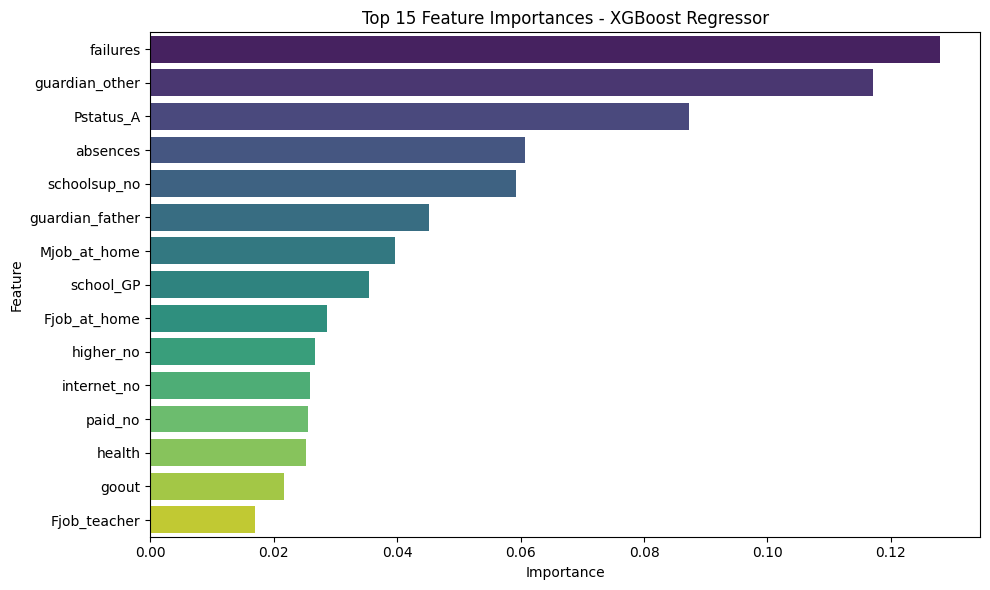

In [38]:
# Get feature importances
importances = xg_boost.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances - XGBoost Regressor')
plt.tight_layout()
plt.savefig('Feature importance without G1 & G2.png', dpi=300, bbox_inches='tight')
plt.show()

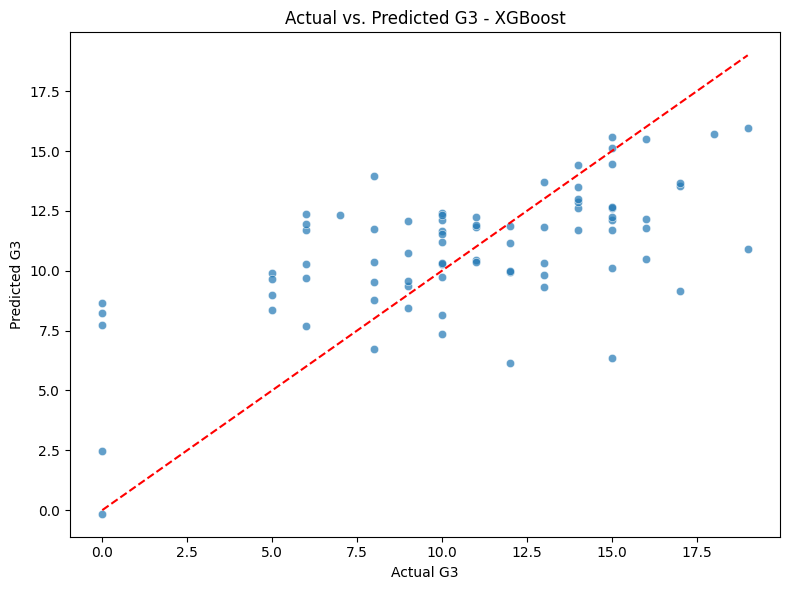

In [37]:
# Predict
y_pred = xg_boost.predict(X_test)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # 45-degree line
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Actual vs. Predicted G3 - XGBoost')
plt.tight_layout()
plt.savefig('xgboost actual vs predicted without G1 & G2.png', dpi=300, bbox_inches='tight')
plt.show()